In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df= pd.read_csv("./heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


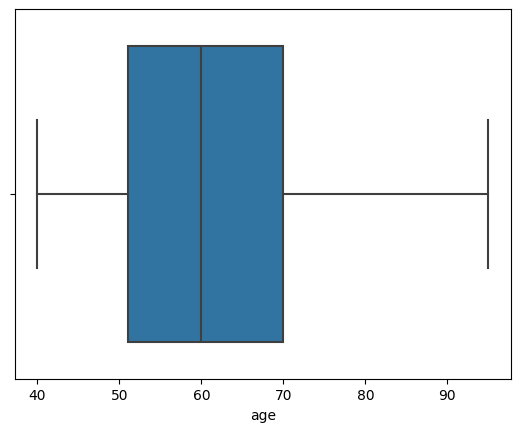

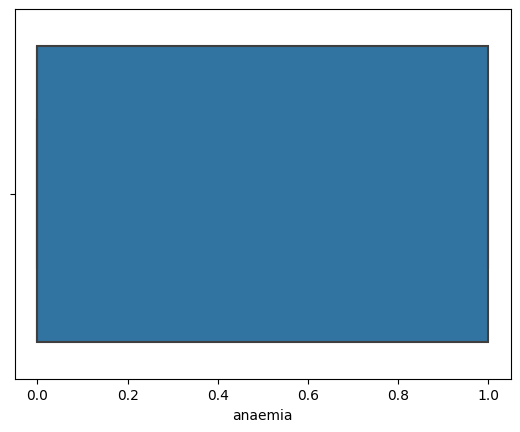

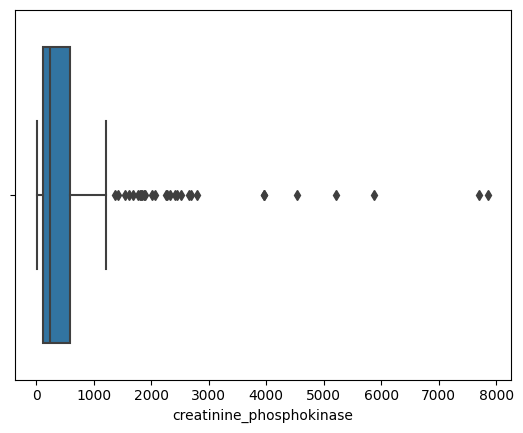

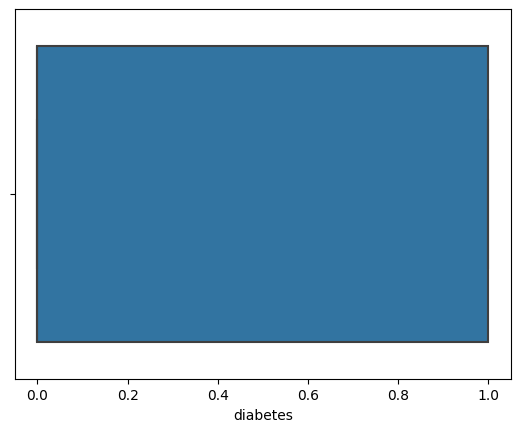

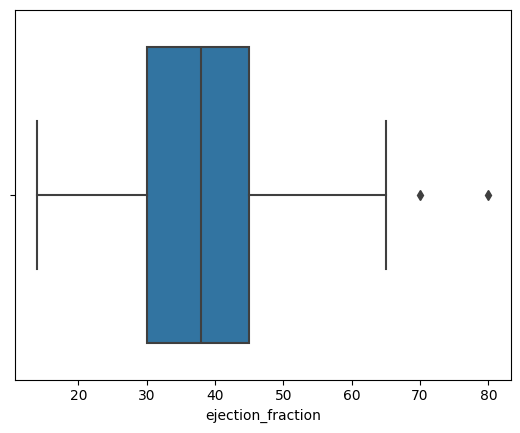

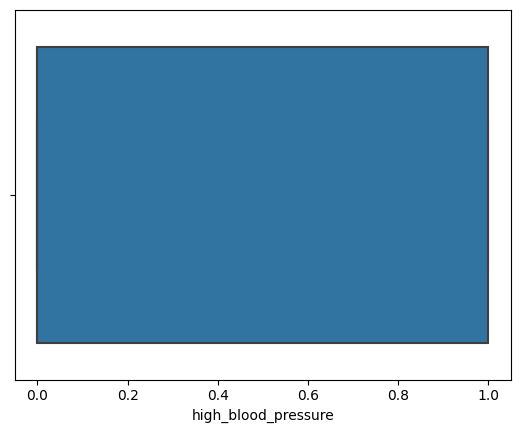

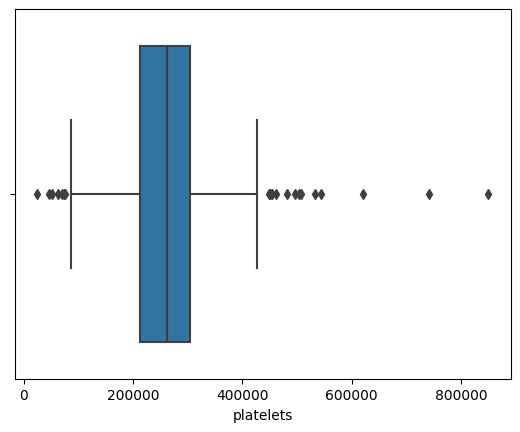

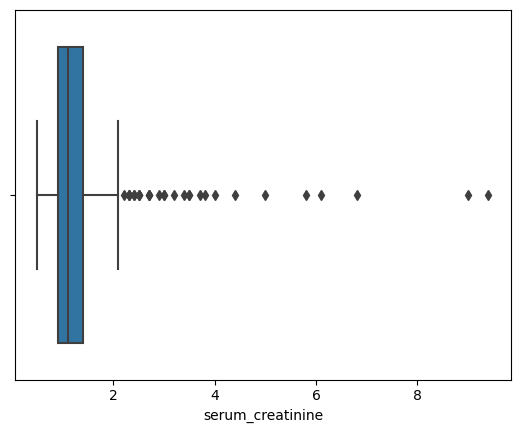

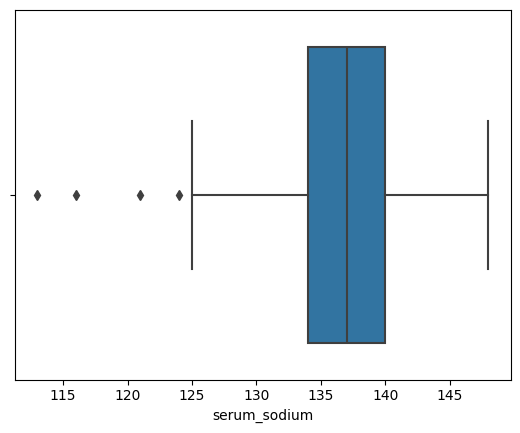

In [6]:
sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['anaemia'])
plt.show()

sns.boxplot(x=df['creatinine_phosphokinase'])
plt.show()

sns.boxplot(x=df['diabetes'])
plt.show()

sns.boxplot(x=df['ejection_fraction'])
plt.show()

sns.boxplot(x=df['high_blood_pressure'])
plt.show()

sns.boxplot(x=df['platelets'])
plt.show()

sns.boxplot(x=df['serum_creatinine'])
plt.show()

sns.boxplot(x=df['serum_sodium'])
plt.show()

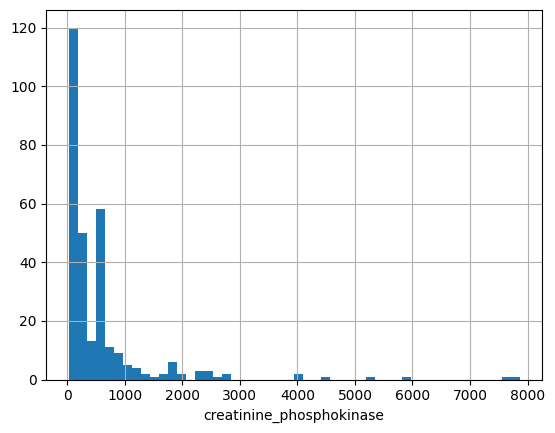

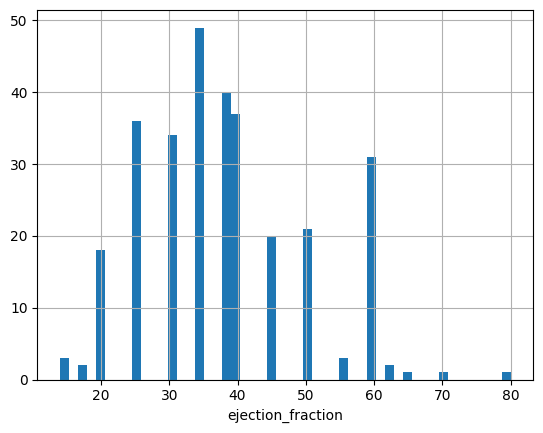

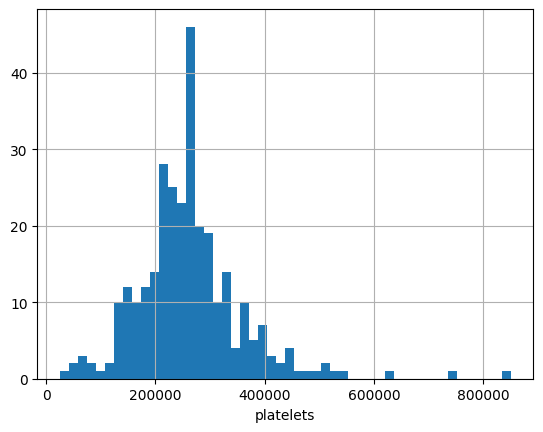

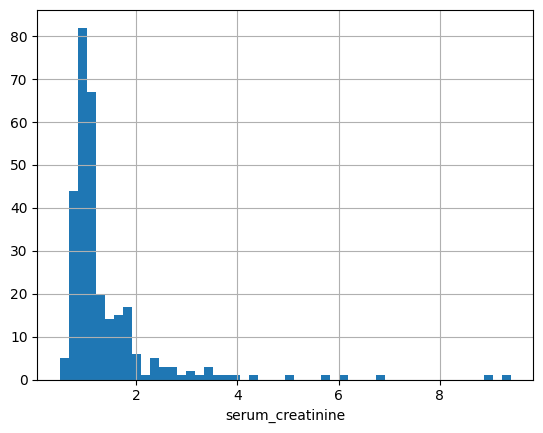

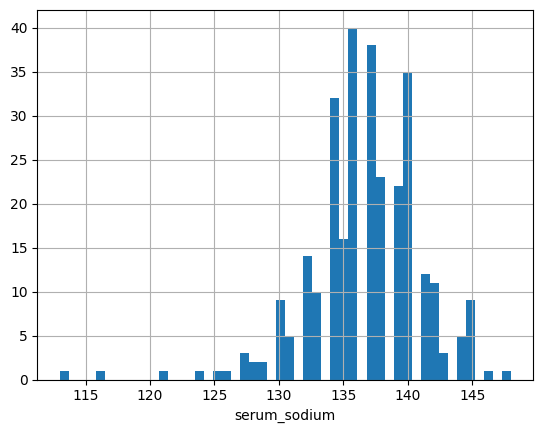

In [8]:
df['creatinine_phosphokinase'].hist(bins=50)
plt.xlabel('creatinine_phosphokinase')
plt.show()

df['ejection_fraction'].hist(bins=50)
plt.xlabel('ejection_fraction')
plt.show()

df['platelets'].hist(bins=50)
plt.xlabel('platelets')
plt.show()

df['serum_creatinine'].hist(bins=50)
plt.xlabel('serum_creatinine')
plt.show()

df['serum_sodium'].hist(bins=50)
plt.xlabel('serum_sodium')
plt.show()

In [22]:
z1_scores = np.abs(stats.zscore(df['creatinine_phosphokinase']))
outliers_z1 = df[z1_scores > 3]
print(outliers_z1.shape)

z2_scores = np.abs(stats.zscore(df['ejection_fraction']))
outliers_z2 = df[z2_scores > 3]
print(outliers_z2.shape)

z3_scores = np.abs(stats.zscore(df['platelets']))
outliers_z3 = df[z3_scores > 3]
print(outliers_z3.shape)

z4_scores = np.abs(stats.zscore(df['serum_creatinine']))
outliers_z4 = df[z4_scores > 3]
print(outliers_z4.shape)

z5_scores = np.abs(stats.zscore(df['serum_sodium']))
outliers_z5 = df[z5_scores > 3]
print(outliers_z5.shape)

(7, 13)
(1, 13)
(3, 13)
(6, 13)
(3, 13)


In [26]:
Q1 = df['creatinine_phosphokinase'].quantile(0.25)
Q3 = df['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['creatinine_phosphokinase'] < lower_bound) | (df['creatinine_phosphokinase'] > upper_bound)]
print(outliers_iqr.shape)

(29, 13)


In [28]:
df_removed = df[(df['creatinine_phosphokinase'] >= lower_bound) & (df['creatinine_phosphokinase'] <= upper_bound)]
print(df_removed.shape)

(270, 13)


In [29]:
outliers_iqr1 = df_removed[(df_removed['creatinine_phosphokinase'] < lower_bound) | (df_removed['creatinine_phosphokinase'] > upper_bound)]
print(outliers_iqr1.shape)

(0, 13)


In [33]:
df_capped = df.copy()
df_capped['creatinine_phosphokinase'] = np.where(df_capped['creatinine_phosphokinase'] > upper_bound, upper_bound, np.where(df_capped['creatinine_phosphokinase'] < lower_bound, lower_bound, df_capped['creatinine_phosphokinase']))
df_capped

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1280.25,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146.00,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111.00,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160.00,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1280.25,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,1280.25,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,1280.25,0,38,0,140000.00,1.4,140,1,1,280,0


In [34]:
outliers_iqr2 = df_capped[(df_capped['creatinine_phosphokinase'] < lower_bound) | (df_capped['creatinine_phosphokinase'] > upper_bound)]
print(outliers_iqr2.shape)

(0, 13)


In [36]:
df_log = df.copy()
df_log['creatinine_phosphokinase'] = np.log(df_log['creatinine_phosphokinase'] + 1)
df_log

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.368187,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,8.969796,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,4.990433,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,4.718499,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,5.081404,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,4.127134,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,7.507141,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,7.630947,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,7.789040,0,38,0,140000.00,1.4,140,1,1,280,0


In [37]:
outliers_iqr3 = df_log[(df_capped['creatinine_phosphokinase'] < lower_bound) | (df_log['creatinine_phosphokinase'] > upper_bound)]
print(outliers_iqr3.shape)

(0, 13)


In [39]:
df_imp = df.copy()
median_value = df['creatinine_phosphokinase'].median()
df_imp.loc[(df_imp['creatinine_phosphokinase'] > upper_bound) | (df_imp['creatinine_phosphokinase'] < lower_bound), 'creatinine_phosphokinase'] = median_value
df_imp

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,250,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,250,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,250,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,250,0,38,0,140000.00,1.4,140,1,1,280,0


In [42]:
outliers_iqr4 = df_imp[(df_capped['creatinine_phosphokinase'] < lower_bound) | (df_imp['creatinine_phosphokinase'] > upper_bound)]
print(outliers_iqr4.shape)

(0, 13)


In [43]:
df_imp.to_csv("exercise_1_week4_imp.csv")
df_log.to_csv("exercise_1_week4_log.csv")

In [45]:
df= pd.read_csv("./credit_scoring_eng.csv")
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car
